# Problem Set 2

Many of the concepts needed to complete this homework are introduced in the recitation notebooks and the python tutorials. 

In [218]:
# Import the packages and libraries you will use here
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn
from matplotlib import pyplot as plt
import statsmodels.api as sm
import sklearn
from sklearn.preprocessing import StandardScaler


### 1
This exercise relates to the College data set, which can be found in the file College.csv. It contains a number of variables for 777 different universities and colleges in the US. The variables are  
* Private : Public/private indicator  
* Apps : Number of applications received  
* Accept : Number of applicants accepted  
* Enroll : Number of new students enrolled  
* Top10perc : New students from top 10 % of high school class  
* Top25perc : New students from top 25 % of high school class  
* F.Undergrad : Number of full-time undergraduates
* P.Undergrad : Number of part-time undergraduates  
* Outstate : Out-of-state tuition  
* Room.Board : Room and board costs  
* Books : Estimated book costs  
* Personal : Estimated personal spending  
* PhD : Percent of faculty with Ph.D.’s  
* Terminal : Percent of faculty with terminal degree  
* S.F.Ratio : Student/faculty ratio  
* perc.alumni : Percent of alumni who donate  
* Expend : Instructional expenditure per student  
* Grad.Rate : Graduation rate  
Before reading the data into python, it can be viewed in Excel or a text editor is well.

### (a)
Use the pandas read_csv() function to read the data into python. Call the loaded data df. Make sure that you have the directory set to the correct location for the data or use the absolute filepath so the program knows where to look for the file. Use `head` and `tail` to show the first 10 and last 10 observations of the data,the default is five so you will need to add an argument for the number of rows. 

In [4]:
#os.getcwd()
#os.chdir(r"C://Users")

df = pd.read_csv("College.csv")
print(df.head(10))
print(df.tail(10))

                     Unnamed: 0 Private  Apps  ...  perc.alumni  Expend  Grad.Rate
0  Abilene Christian University     Yes  1660  ...           12    7041         60
1            Adelphi University     Yes  2186  ...           16   10527         56
2                Adrian College     Yes  1428  ...           30    8735         54
3           Agnes Scott College     Yes   417  ...           37   19016         59
4     Alaska Pacific University     Yes   193  ...            2   10922         15
5             Albertson College     Yes   587  ...           11    9727         55
6       Albertus Magnus College     Yes   353  ...           26    8861         63
7                Albion College     Yes  1899  ...           37   11487         73
8              Albright College     Yes  1038  ...           23   11644         80
9     Alderson-Broaddus College     Yes   582  ...           15    8991         52

[10 rows x 19 columns]
                          Unnamed: 0 Private  ...  Expend  Grad

### (b)
Read in the data again this time calling the data college and using the parameter index_col=0 in the read_csv function. Notice the difference between the index used when the dataframe is displayed. 

In [5]:
df = pd.read_csv("College.csv", index_col=0)
print(df.head(10))
print(df.tail(10))

                             Private  Apps  ...  Expend  Grad.Rate
Abilene Christian University     Yes  1660  ...    7041         60
Adelphi University               Yes  2186  ...   10527         56
Adrian College                   Yes  1428  ...    8735         54
Agnes Scott College              Yes   417  ...   19016         59
Alaska Pacific University        Yes   193  ...   10922         15
Albertson College                Yes   587  ...    9727         55
Albertus Magnus College          Yes   353  ...    8861         63
Albion College                   Yes  1899  ...   11487         73
Albright College                 Yes  1038  ...   11644         80
Alderson-Broaddus College        Yes   582  ...    8991         52

[10 rows x 18 columns]
                                Private   Apps  ...  Expend  Grad.Rate
Winthrop University                  No   2320  ...    6729         59
Wisconsin Lutheran College          Yes    152  ...    8960         50
Wittenberg University     

### (c)
Now we will do some prelimainary analysis and visualizations of the data that was loaded  
$\mathbf{i)}$ Use the describe method of the dataframe object that you made by reading in the data to show the summary statistics of each of the columns

In [6]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


$\mathbf{ii)}$ Use the scatter_matrix function that was imported from pandas to produce scatter plots of the pairwise combinations of 6 of the variables of your choice. Adjust the figsize argument make the displayed plots more readable and understandable.

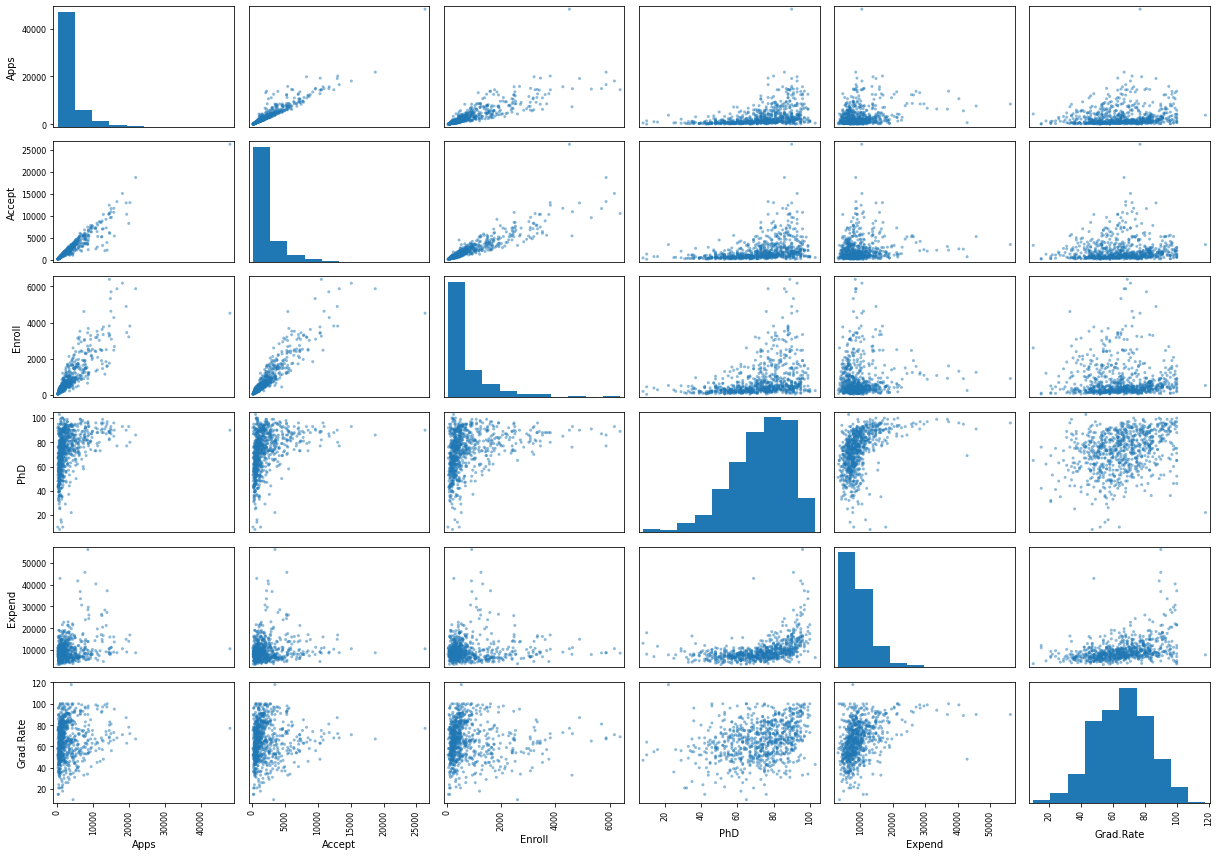

In [7]:
scatter_matrix(df[['Apps', 'Accept', 'Enroll', 'PhD', 'Expend', 'Grad.Rate']], figsize=(17,12))
# call the function above these lines
plt.tight_layout() # this makes the output a little neater when you display plots
plt.show() # this will force the plots to show, they only show without this if they are the output of the last line in a cell

$\mathbf{iii)}$ Use seaborn's or matplotlib's boxplot function to create a boxplot of Outstate on private.  
Hint: You can either pass in the columns as objects or the names of the columns and use data=college as a parameter

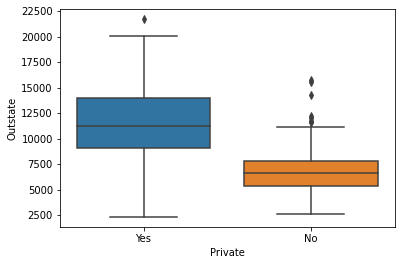

In [54]:
#print(df['Private'].dtypes)
#plt.boxplot(df['Outstate'] if(df['Private']), data='College.csv')
#plt.show()
#plt.boxplot(df['Outstate'], usermedians=df['Private'])
#plt.show()
#df.boxplot('Outstate')

seaborn.boxplot(x=df['Private'], y=df['Outstate'])


$\mathbf{iv)}$  Create a new qualitative variable in the dataframe, called Elite, by binning the Top10perc variable. We are going to divide universities into two groups based on whether or not the number of students coming from the top 10% of their high school classes exceeds 50.

In [42]:
df['Elite'] = df['Top10perc'] > 50
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Elite
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,False
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,False
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,False
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,True
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,False


Get a count of how many universities are in the 'Elite' category. Now make boxplot of Outstate on Elite.

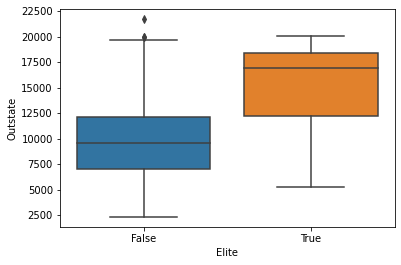

In [55]:
seaborn.boxplot(x=df['Elite'], y=df['Outstate'])


$\mathbf{v)}$ Use seaborn's distplot function to produce some histograms with differing numbers of bins for a quantitative variable of your choice. You can make multiple cells or if you are familiar with python try making a grid of multiple plots to be displayed by one cell.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


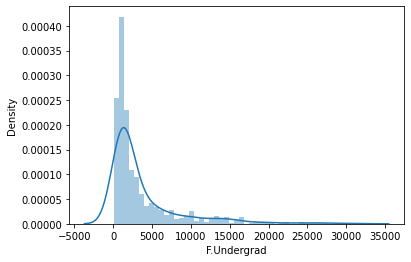

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


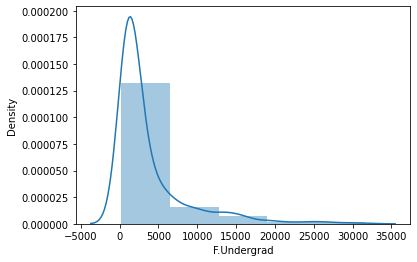

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


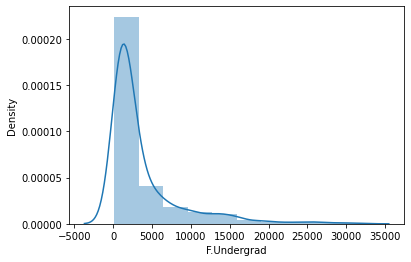

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


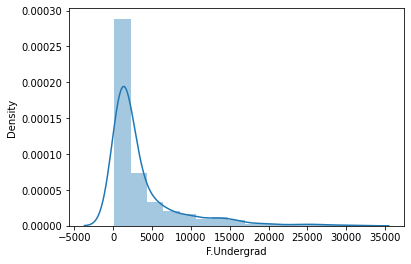

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


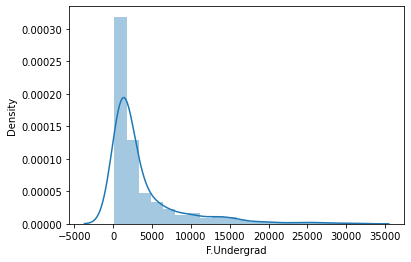

In [74]:
seaborn.distplot(df['F.Undergrad'])
plt.show()
seaborn.distplot(df['F.Undergrad'], bins=5)
plt.show()
seaborn.distplot(df['F.Undergrad'], bins=10)
plt.show()
seaborn.distplot(df['F.Undergrad'], bins=15)
plt.show()
seaborn.distplot(df['F.Undergrad'], bins=20)
plt.show()

You can create a grid of histograms with the hist method of the dataframe. Choose some variables that seem interesting and create hhistograms in this way.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fefc8ec3128>,
      dtype=object)

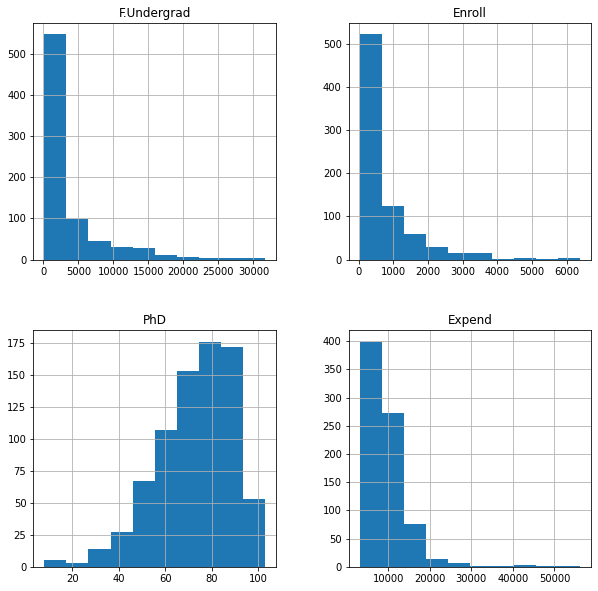

In [86]:
df.hist(column=['F.Undergrad', 'Enroll', 'PhD', 'Expend'], figsize=(10,10))

Using the tools that were introduced and/or other ones you find, continue exploring the data set and write a brief summary of what you find. This should involve something you do that was not a part of the previous responses.  
We are not looking for anything in particular just try to make something that shows something about the data ond its relationships in graphs or summary statistics that you haven't already created above.

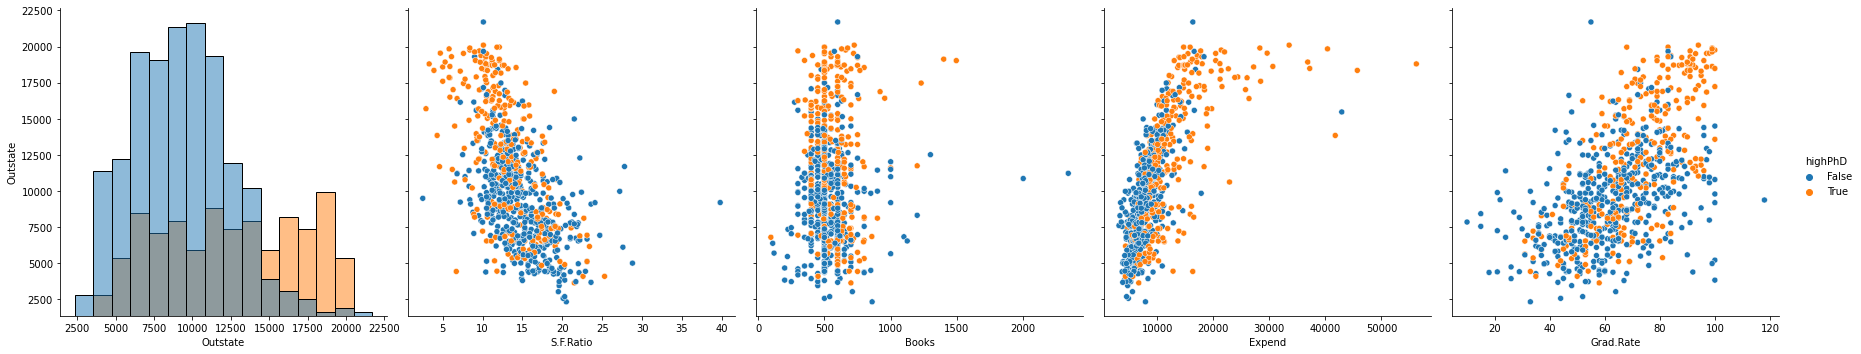

In [111]:
#g = seaborn.PairGrid(df)
#g.map(seaborn.scatterplot)
df['highPhD'] = df['PhD'] > 80

x_vars = ['Outstate', 'S.F.Ratio', 'Books', 'Expend', 'Grad.Rate']
y_vars = ['Outstate']
g = seaborn.PairGrid(df, hue='highPhD', x_vars=x_vars, y_vars=y_vars, height=5)
g.map_diag(seaborn.histplot, color=".3")
g.map_offdiag(seaborn.scatterplot)
g.add_legend()

Explain what you did and what it means here:

I made some graphs in an attempt to understand what variables are correlated with Out-of-State tuition. I made a variable called 'highPhD', which is an indicator if over 80% of the faculty has a PhD. This is the hue in each of the graphs. Orange indicates that over 80% of the faculty has a PhD whereas blue indicates that less than 80% has a PhD. I colored the graphs this way in order to see how faculty education levels played into the relationships of out-of-state tuition with other variables.

The student to faculty ratio is negatively correlated with out-of-state tuition. This could reveal that the costs of hiring more faculty is passed on to the students. Additionally, schools with a high percentage of PhD faculty tend to have a smaller student-to-faculty ratios. I thought this was interesting because maybe it reflects that PhD professors have more bargaining power, and they use some of that power to choose smaller class sizes.

The cost of Books is not closely correlated with out-of-state tuition. This is interesting because I expected that they would be positively correlated.

Expenditures per student is positively correlated with out-of-state tuition. This reflects that higher per-student expenditures are passed on in the form of higher tuition. This graph also shows the strong positive correlation between the high percentage of PhD faculty and both expenditures and tuition. Having a high percentage of PhD faculty seems to drive up expenditure-per-student and therefore tuition.

A few schools with extremely high tuition have per-student expenditures that are far higher than tuition. I think this might reflect that elite schools often recieve large endowments, and though tuition is high, they partially subsidize student tuition with the endowment.

The last graph shows that schools with higher tuition also have higher graduation rates. I find it hard to believe that this correlation is causal because it seems like high tuition rates would make it hard to finish school. Instead, I think that students who go to elite schools (with higher tuition) are more likely to stay and finish their degree.

## Chapter 3
$\mathbf{a)}$Load in auto.csv as a dataframe and the produce a grid of the pairwise scatterplots of the variables of the dataframe

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fefa3453f28>,
      dtype=object)

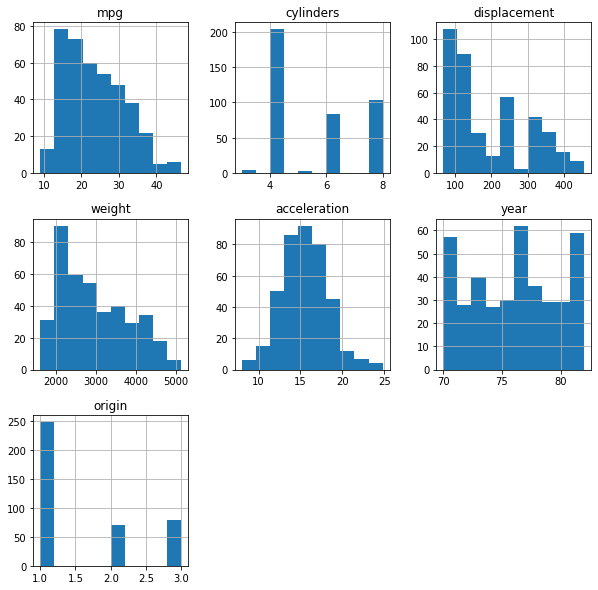

In [170]:
auto = pd.read_csv("Auto.csv")
auto.hist(figsize=(10,10))


$\mathbf{b)}$ Show the correlation matrix. There are several ways to do this but you should be able to find a function that makes it for the numeric variables of a dataframe.

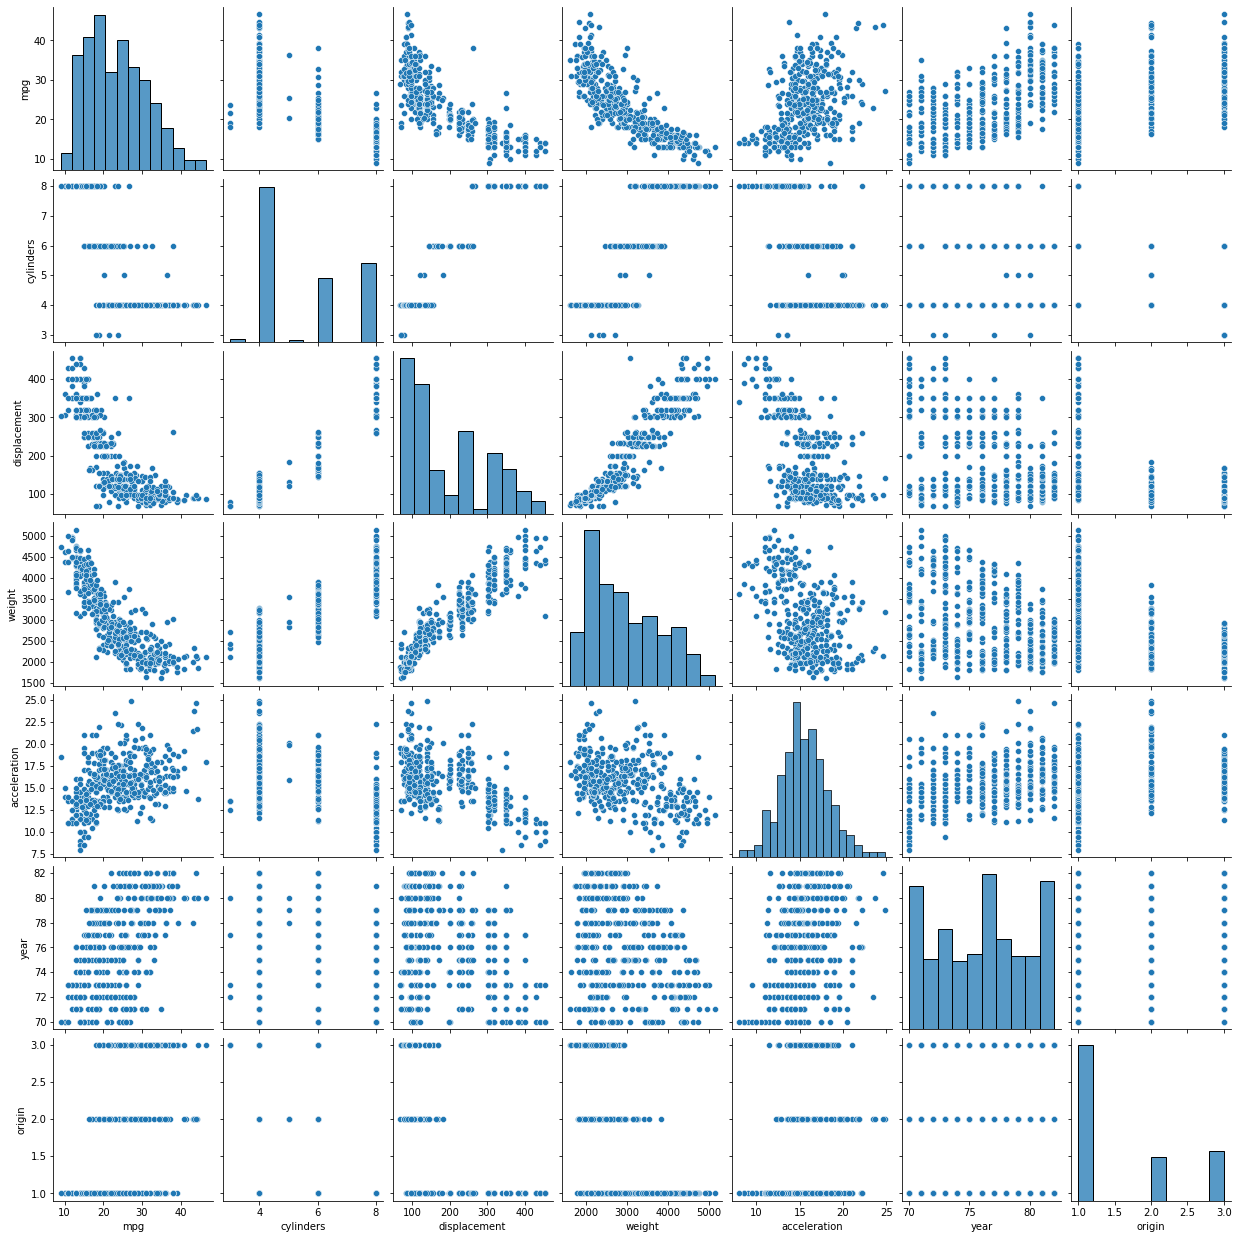

In [120]:
seaborn.pairplot(auto)


$\mathbf{c)}$ Use the statsmodel OLS function to perform a linear regression with mpg as the response and year as a feature (a variable in the regression). Use the summary() method to print the results. 

In [129]:
# fill in the variable names you plan on using in the regression
X = auto.loc[:,['year','weight','cylinders']]
y = auto['mpg']
reg_obj = sm.OLS(y,X)
results = reg_obj.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              6563.
Date:                Wed, 30 Sep 2020   Prob (F-statistic):                        0.00
Time:                        02:41:39   Log-Likelihood:                         -1057.4
No. Observations:                 397   AIC:                                      2121.
Df Residuals:                     394   BIC:                                      2133.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Do a linear regression with mpg as the outcome and all other variables except name as the predictors. Comment on the output. For instance:  
i. Is there a relationship between the predictors and the response?  
ii. Which predictors appear to have a statistically significant relationship to the response?  
iii. What does the coefficient for the year variable suggest?

In [155]:
X = auto.loc[:,['year','weight','cylinders', 'displacement','origin', 'acceleration']]
y = auto['mpg']
reg_obj = sm.OLS(y,X)
results = reg_obj.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              3393.
Date:                Wed, 30 Sep 2020   Prob (F-statistic):                        0.00
Time:                        03:16:19   Log-Likelihood:                         -1049.3
No. Observations:                 397   AIC:                                      2111.
Df Residuals:                     391   BIC:                                      2135.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

  i. Is there a relationship between the predictors and the response?
 #   yes, there is a strong relationship between almost all the variables and mpg. The only one that is not significant at the .10 level is acceleration.

  ii. Which predictors appear to have a statistically significant relationship to the response?
 #   year, weight, displacement, and origin are statistically significant at the 0.05 level. 'cylinders' is not quite significant at that level. 'acceleration' is not even close to significant.

  iii. What does the coefficient for the year variable suggest?
#    The  coefficient for the year variable is about 0.55, suggesting that mpg increases with the newer cars. Specifically, MPG increases by one about every two years.

$\mathbf{d)}$ Use statsmodels' inluence_plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

     year  weight  cylinders  displacement  origin  acceleration
0      70    3504          8         307.0       1          12.0
1      70    3693          8         350.0       1          11.5
2      70    3436          8         318.0       1          11.0
3      70    3433          8         304.0       1          12.0
4      70    3449          8         302.0       1          10.5
..    ...     ...        ...           ...     ...           ...
392    82    2790          4         140.0       1          15.6
393    82    2130          4          97.0       2          24.6
394    82    2295          4         135.0       1          11.6
395    82    2625          4         120.0       1          18.6
396    82    2720          4         119.0       1          19.4

[397 rows x 6 columns]


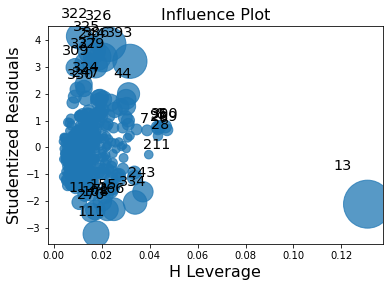

In [156]:
sm.graphics.influence_plot(results)


Comment on any problems you see with the fit.
#The plot is hard to decipher. Some of the numbers are overlapping and hard to read.
 Do the residual plots suggest any unusually large outliers? 
 # yes there is a massive outlier on the edge of the plot.
 Does the leverage plot identify any observations with unusually high leverage?
 # there is one outlier with extremely high leverage. Not sure whats up with that but it probably has a huge impact on the regression

$\mathbf{e)}$ Create some polynomial and interaction features from the existing set of variables and fit linear regression models with them. Do any interaction terms appear to be statistically significant? What about polynomial terms?  
# yes, both some of the interaction terms and some of the polynomial terms appear to be statistically significant.
A relativley easy way to do this si the use scikit-learn's polynomial features but you can add in interaction and squared columns individually to the dataframe by multiplying columns together.

In [162]:
poly = sklearn.preprocessing.PolynomialFeatures()
GG = poly.fit_transform(X)

reg_obj = sm.OLS(y,GG)
results = reg_obj.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     110.4
Date:                Wed, 30 Sep 2020   Prob (F-statistic):          7.85e-159
Time:                        03:19:55   Log-Likelihood:                -941.72
No. Observations:                 397   AIC:                             1939.
Df Residuals:                     369   BIC:                             2051.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        367.1044     86.809      4.229      0.0

## PCA
In the first cell I have some code which will generate some random data with 500 features and 10000 observations. There will be 3 clusters of groups indicated by the y variable. Use PCA to reduce the dimensionality down to 2 principle components. Sklearn has a PCA and TruncatedSVD object you can use, the difference will just be demeaning the values or not so there shouldn't be a big difference in results from either method.

In [219]:
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

SEED = 123
X, y = make_blobs(n_samples=10000, n_features=500, cluster_std=90., random_state=SEED)


In [257]:

pca = PCA(n_components=2)
pca.fit(X)

# transform data onto the first two principal components
x_pca = pca.transform(X)
print("Original shape: {}".format(str(X.shape)))
print("Reduced shape: {}".format(str(x_pca.shape)))

#print("PCA components:\n{}".format(pca.components_))

Original shape: (10000, 500)
Reduced shape: (10000, 2)


Generate a plot of the 2 principal components that were found. You may find it helpful to combine X and y into a pandas DataFrame object so that it plays mroe nicely with seaborn.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


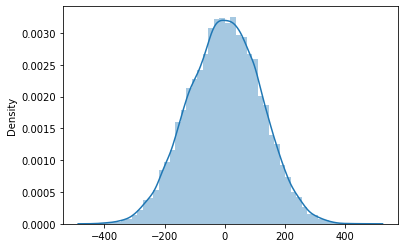

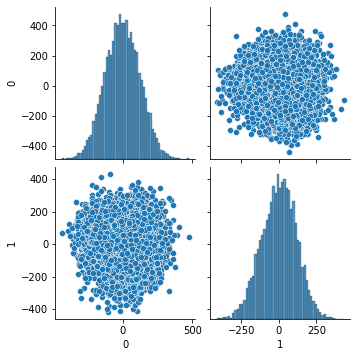

In [258]:
blobs = pd.DataFrame(x_pca)
seaborn.distplot(blobs)
seaborn.pairplot(blobs)

## KMeans

In [259]:
from sklearn.cluster import KMeans



Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels? You can use the classifcation report function from skelarn to get some metrics that measure the quality of the model you used.

i think k=3 does pretty good compared to the true class labels

In [260]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
predictions3 = kmeans.predict(X)
print(sklearn.metrics.classification_report(y,predictions3))

              precision    recall  f1-score   support

           0       0.12      0.12      0.12      3334
           1       0.70      0.70      0.70      3333
           2       0.11      0.12      0.12      3333

    accuracy                           0.31     10000
   macro avg       0.31      0.31      0.31     10000
weighted avg       0.31      0.31      0.31     10000



Perform K-means clustering with K = 2. Describe your results.

results do not seem to be as good as k=3

In [261]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
predictions2 = kmeans.predict(X)
print(sklearn.metrics.classification_report(y,predictions2))

              precision    recall  f1-score   support

           0       0.53      0.84      0.65      3334
           1       0.30      0.43      0.35      3333
           2       0.00      0.00      0.00      3333

    accuracy                           0.42     10000
   macro avg       0.28      0.42      0.33     10000
weighted avg       0.28      0.42      0.33     10000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now perform K-means clustering with K = 4, and describe your results.

does not seem to do as well as k=3 because it only needed 3 clusters


In [262]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
predictions4 = kmeans.predict(X)
print(sklearn.metrics.classification_report(y,predictions4))

              precision    recall  f1-score   support

           0       0.72      0.53      0.61      3334
           1       0.38      0.25      0.30      3333
           2       0.16      0.12      0.14      3333
           3       0.00      0.00      0.00         0

    accuracy                           0.30     10000
   macro avg       0.31      0.23      0.26     10000
weighted avg       0.42      0.30      0.35     10000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data. That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

# does not seem to do well at all


In [263]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_pca)
predict3 = kmeans.predict(x_pca)
print(sklearn.metrics.classification_report(y,predict3))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      3334
           1       0.68      0.66      0.67      3333
           2       0.71      0.70      0.71      3333

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



Using of of sklearn's data scalers, perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (b)? Explain.


I think with the data scalers, k-means clustering is worse than in b. But I'm not sure why. Maybe because pc 1 carries most of the information so that the prediction on pc 1 is good, but the others are worse.

In [267]:
scaler = StandardScaler()
scaler.fit(X)
x_scaled = scaler.transform(X)

pca = PCA(n_components=2)
pca.fit(x_scaled)

# transform data onto the first two principal components
x_pca = pca.transform(x_scaled)
print("Original shape: {}".format(str(x_scaled.shape)))
print("Reduced shape: {}".format(str(x_pca.shape)))

#print("PCA components:\n{}".format(pca.components_))

kmeans = KMeans(n_clusters=3)
kmeans.fit(x_pca)
predict3 = kmeans.predict(x_pca)
print(sklearn.metrics.classification_report(y,predict3))

Original shape: (10000, 500)
Reduced shape: (10000, 2)
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      3334
           1       0.17      0.17      0.17      3333
           2       0.16      0.15      0.16      3333

    accuracy                           0.35     10000
   macro avg       0.34      0.35      0.35     10000
weighted avg       0.34      0.35      0.35     10000



## Supervised Machine Learning
In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set. you should be able to use the same dataframe for the previous problem using the auto dataset here as well or you can load it in and start over if you want to practice

In [268]:
print(auto.head())

    mpg  cylinders  displacement  ... year  origin                       name
0  18.0          8         307.0  ...   70       1  chevrolet chevelle malibu
1  15.0          8         350.0  ...   70       1          buick skylark 320
2  18.0          8         318.0  ...   70       1         plymouth satellite
3  16.0          8         304.0  ...   70       1              amc rebel sst
4  17.0          8         302.0  ...   70       1                ford torino

[5 rows x 9 columns]


Calling the functions is similar for all of the functions from sklearn. This is one of the really nice things about the library: if you know how to use one then you know how to use them all. You will be asked to use models we have not deeply discussed in lecture but that will not change the coding aspect of it so you should be able to complete the assignment without knowing what exactly is happening. This is just meant to introduce you to how to use models from scikit-learn so don't worry if this is the case. This is one of the problems with the way a lot of people try to use machine learning so I do not recommend it in the future as predictions from a model you don't understand are probably not very good predictions no matter how good the scoring metrics do. 

In [269]:
# this creates a variable named mpg01 that indicates whetehr or not gas mileage iss above the median of the sample
auto['mpg01'] = auto['mpg'] > auto['mpg'].median()

Scikit-learn is set up so that if you know how to use one model you know how to use them all. Here is an example of the steps that you will follow in general for classification, like in the following question. A regression problem is with a continuous outcome and classification is with a discrete outcome.
```python
from sklearn.submoodule import Model # import a model from the appropriate submodule of scikit-learn
model_obj = Model() # create a model object with relevant tuning parameters
model_obj.fit(X, y) # fit the model to your data
model_obj.score(X, y) # get a score of how well the model does using a loss function
```

$(a)$ Create an X matrix and a Y vector. The variable you created called `mpg01` will be the y variable.  
Are there any variables that should not be included? Hint: I am aking this because there is a variable that should not be included.

In [271]:
y = auto['mpg01']
X = auto.loc[:,['year','weight','cylinders', 'displacement','origin', 'acceleration']]

#we should only include numeric variables. we should not include 'name' variable

$(b)$ Perform Linear Discriminant Analysis (LDA) on the training data in order to predict `mpg01`. How accurate is the model?

In [274]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # import a model from the appropriate submodule of scikit-learn
model_obj = LinearDiscriminantAnalysis() # create a model object with relevant tuning parameters
model_obj.fit(X, y) # fit the model to your data
model_obj.score(X, y) # get a score of how well the model does using a loss function


# the model seems to be pretty accurate with a loss function value of 0.9


0.9042821158690176

$(c)$ Perform Quadratic Discriminant Analysis (QDA) on the training data in order to predict `mpg01`. How accurate is the model?

In [275]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis # import a model from the appropriate submodule of scikit-learn
model_obj = QuadraticDiscriminantAnalysis() # create a model object with relevant tuning parameters
model_obj.fit(X, y) # fit the model to your data
model_obj.score(X, y) # get a score of how well the model does using a loss function

# this model does just a little bit better than LDA (.917)

0.9168765743073047

$(d)$ Perform logistic regression on the training data in order to predict `mpg01`. How accurate is the model?

In [277]:
from sklearn.linear_model import LogisticRegression # import a model from the appropriate submodule of scikit-learn
model_obj = LogisticRegression(max_iter=300) # create a model object with relevant tuning parameters
model_obj.fit(X, y) # fit the model to your data
model_obj.score(X, y) # get a score of how well the model does using a loss function

#this model does about as well as QDA with a score of .914

0.9143576826196473

$(e)$ Perform K-nearest Neighbors on the training data in order to predict `mpg01`. How accurate is the model?  
Which value of K seems to perform the best on this data set?

In [287]:
from sklearn.neighbors import NearestNeighbors # import a model from the appropriate submodule of scikit-learn
model_obj = NearestNeighbors(n_neighbors=5) # create a model object with relevant tuning parameters
model_obj.fit(X, y) # fit the model to your data


NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

$(f)$ Now run a random forest classifier on the data. If you are feeling comfortable with this, you can try different parameters to try and tune the model to give better results. This is not necessary to receive full credit.

In [285]:
from sklearn.ensemble import RandomForestClassifier # import a model from the appropriate submodule of scikit-learn
model_obj = RandomForestClassifier(n_estimators=2, max_depth=10) # create a model object with relevant tuning parameters
model_obj.fit(X, y) # fit the model to your data
model_obj.score(X, y) # get a score of how well the model does using a loss function

0.9596977329974811